In [151]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

results = "data/Big_Dance_CSV.csv"
results_df = pd.read_csv(results)

In [23]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 10 columns):
Year             2205 non-null int64
Round            2205 non-null int64
Region Number    2205 non-null int64
Region Name      2205 non-null object
Seed             2205 non-null int64
Score            2205 non-null int64
Team             2205 non-null object
Team.1           2205 non-null object
Score.1          2205 non-null int64
Seed.1           2205 non-null int64
dtypes: int64(7), object(3)
memory usage: 172.4+ KB


In [59]:
results_df.columns 
columns = ['Year','Seed', 'Score','Score.1', 'Seed.1']

scores_df = results_df[columns]
scores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 5 columns):
Year       2205 non-null int64
Seed       2205 non-null int64
Score      2205 non-null int64
Score.1    2205 non-null int64
Seed.1     2205 non-null int64
dtypes: int64(5)
memory usage: 86.3 KB


In [60]:
#get the last digit of each game
scores_df["Score"] = scores_df["Score"].mod(10) 
scores_df["Score.1"] = scores_df["Score.1"].mod(10)

scores_df

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Year,Seed,Score,Score.1,Seed.1
0,1985,1,3,9,16
1,1985,2,1,5,15
2,1985,3,5,6,14
3,1985,4,5,0,13
4,1985,5,8,5,12
5,1985,6,5,9,11
6,1985,7,0,1,10
7,1985,8,4,3,9
8,1985,1,8,3,16
9,1985,2,5,8,15


In [61]:
same_seed_df = results_df.loc[results_df["Seed"] == results_df["Seed.1"]]
same_seed_df.shape[0]/scores_df.shape[0] * 100

1.179138321995465

In [111]:
same_seed_df.reset_index()

,index,Year,Round,Region Number,Region Name,Seed,Score,Team,Team.1,Score.1,Seed.1
0,60,1985,5,1,Final Four,1,59,St Johns,Georgetown,77,1
1,124,1986,5,2,Final Four,1,71,Duke,Kansas,67,1
2,186,1987,5,1,Final Four,1,93,UNLV,Indiana,97,1
3,250,1988,5,2,Final Four,1,78,Arizona,Oklahoma,86,1
4,314,1989,6,1,Championship,3,80,Michigan,Seton Hall,79,3
5,564,1993,5,1,Final Four,1,78,Kentucky,Michigan,81,1
6,566,1993,6,1,Championship,1,71,Michigan,North Carolina,77,1
7,690,1995,5,1,Final Four,2,75,Arkansas,North Carolina,68,2
8,754,1996,5,2,Final Four,1,74,Massachusetts,Kentucky,81,1
9,816,1997,5,1,Final Four,1,78,Kentucky,Minnesota,69,1


In [152]:
numbers = [str(x) for x in range(0, 10)]

scores_df["high_score"] = scores_df.apply(lambda row: row["Score"] if row["Seed"] <= row["Seed.1"] else row["Score.1"], axis=1)
scores_df["low_score"] = scores_df.apply(lambda row: row["Score.1"] if row["Seed"] <= row["Seed.1"] else row["Score"], axis=1)

scores_df

,Year,Seed,Score,Score.1,Seed.1,high_score,low_score
0,1985,1,3,9,16,3,9
1,1985,2,1,5,15,1,5
2,1985,3,5,6,14,5,6
3,1985,4,5,0,13,5,0
4,1985,5,8,5,12,8,5
5,1985,6,5,9,11,5,9
6,1985,7,0,1,10,0,1
7,1985,8,4,3,9,4,3
8,1985,1,8,3,16,8,3
9,1985,2,5,8,15,5,8


In [148]:
#populate the squares df
squares_df = pd.DataFrame(0, columns = numbers, index = numbers)

for row in scores_df.iterrows():
    series = row[1]
    
    high_idx = series["high_score"]
    low_idx = series["low_score"]
    
    value = squares_df.iloc[low_idx][high_idx]
    value+=1
    squares_df.iat[low_idx,high_idx] = value

#convert to percentages
squares_df = squares_df / scores_df.shape[0] * 100
graph_df = squares_df.copy()

#calculate totals
squares_df.loc['Column_Total']= squares_df.sum(axis=0)
squares_df.loc[:,'Row_Total'] = squares_df.sum(axis=1)

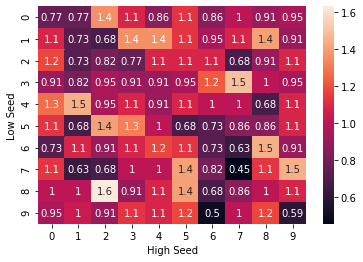

In [167]:
maxVal = graph_df.max().max()
minVal = graph_df.min().min()

ax = sns.heatmap(graph_df, vmin=minVal, vmax=maxVal, annot=True)
ax.set_xlabel("High Seed")
ax.set_ylabel("Low Seed")

plt.show()

In [163]:
squares_df

,0,1,2,3,4,5,6,7,8,9,Row_Total
0,0.770975,0.770975,1.360544,1.088435,0.861678,1.133787,0.861678,0.997732,0.907029,0.952381,9.705215
1,1.088435,0.725624,0.680272,1.360544,1.360544,1.133787,0.952381,1.088435,1.405896,0.907029,10.702948
2,1.179138,0.725624,0.816327,0.770975,1.088435,1.088435,1.088435,0.680272,0.907029,1.088435,9.433107
3,0.907029,0.816327,0.952381,0.907029,0.907029,0.952381,1.224490,1.496599,0.997732,0.952381,10.113379
4,1.269841,1.451247,0.952381,1.088435,0.907029,1.088435,0.997732,0.997732,0.680272,1.088435,10.521542
5,1.133787,0.680272,1.405896,1.315193,0.997732,0.680272,0.725624,0.861678,0.861678,1.088435,9.750567
6,0.725624,1.088435,0.907029,1.088435,1.179138,1.133787,0.725624,0.634921,1.451247,0.907029,9.841270
7,1.133787,0.634921,0.680272,0.997732,0.997732,1.405896,0.816327,0.453515,1.133787,1.451247,9.705215
8,0.997732,0.997732,1.632653,0.907029,1.088435,1.405896,0.680272,0.861678,0.997732,1.088435,10.657596
9,0.952381,1.043084,0.907029,1.133787,1.088435,1.179138,0.498866,0.997732,1.179138,0.589569,9.569161
